# Playing multi-armed bandits

In [1]:
from math import sqrt, log
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pelper import pipe
import seaborn as sns

from pandits import strategies
from pandits.bandit import Bandit 
from pandits import belief
from pandits import metrics
from pandits.evaluation import (
    run_experiments,
    collect_statistics,
    plot_statistics,
)
import pandas as pd
from IPython.display import display, Math


%matplotlib inline

# Vis UCB
Slightly adjusted UCB class to simplify plotting.

In [2]:
class UCB1(strategies.StrategyABC):
    """
    Upper confidence bound strategy.

    .. math ::

            i^* = \arg \max_{i=1..k} \left(
                    \hat\mu_i + \sqrt{ \frac{2 \ln n}{n_i} }
                  \right)

    See:
        Auer et al, Finite-time Analysis of the Multiarmed Bandit Problem, 2002

    """
    def __init__(self, bandit):
        super(UCB1, self).__init__(bandit)
        self.name = "UCB1"
        # for plotting later
        self.ucb_rewards = []
        self.ucb_mu = []
        self.ucb_bonus = []

    def _select_bandit(self):
        if self.step < self.bandit.n:  # play each bandit once
            arm_id = self.step
        else:
            arm_id = self._select_bandit_ucb()
        return arm_id

    def _select_bandit_ucb(self):
        # play the machine that maximizes:
        #       avg_reward + srqt((2 * ln * n_total) / n_played)

        _total = []        
        for i in range(self.bandit.n):
            # avg reward of machine i
            r_i = belief.mean_reward(self.hist, i)
            # how often machine i was played
            n_i = belief.n_played(self.hist, i)
            # the total number of rounds played
            n = len(self.hist)
            bonus = sqrt((2 * log(n)) / n_i)

            # The ucb criteria
            ucb_reward = r_i + bonus

            _total.append(ucb_reward)
            
        arm_id = np.argmax(_total)
        # arm_id = np.aragmax(f_)
        return arm_id

# Bandit Demo

In [3]:
bandit = Bandit([
    stats.bernoulli(.3),
    stats.bernoulli(.8),
])
ucb1 = UCB1(bandit)

In [4]:
for i in range(4):
    print(ucb1.next())

Observation(arm_id=0, reward=1)
Observation(arm_id=1, reward=1)
Observation(arm_id=0, reward=0)
Observation(arm_id=1, reward=1)


In [5]:
def play():
    # UCB1 math for plotting
    mu_i = np.array([belief.mean_reward(ucb1.hist, 0), belief.mean_reward(ucb1.hist, 1)])
    n_i = np.array([belief.n_played(ucb1.hist, 0), belief.n_played(ucb1.hist, 1)])
    n = len(ucb1.hist)
    bonus = np.sqrt(2 * np.log(n) / n_i)
    total = mu_i + bonus
    
    # PLOT
    plt.xkcd()
    fig, ax = plt.subplots()
    dom = [.5, 1.5]
    ax.bar(dom, total, width=.3)
    ax.bar(dom, mu_i, width=.3)
    ax.legend(['bonus', '$\mu$'])
    ax.set_ylim(0, 3);
    ax.set_xlim(0, 2);
    ax.set_xticks([])
    #ax.set_yticks([])
    sns.despine(ax=ax)

    #fig.savefig('images/b{}.png'.format(i))

    for i in range(2):
        tex = r'i=%d: \quad  \color{green}{%.2f} + \color{blue}{\sqrt{ \frac{2 \ln %d }{%d}}} = \color{green}{%.2f} + \color{blue}{%.2f} = %.4f' % (
            i,
            mu_i[i],
            n,
            n_i[i],
            mu_i[i],
            bonus[i],
            total[i],
        )
        display(Math(tex))


    df = pd.DataFrame({
        '$\mu$': mu_i,
        'bonus': bonus,
        '$n_i$': n_i,
        '$n$': [n, n],
        'r': total,
    })
    #display(df)


    print(f'Last observation: {ucb1.hist[-1]}')
    ucb1.next();

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


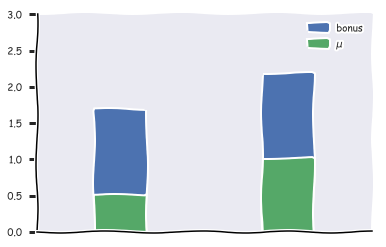

In [6]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


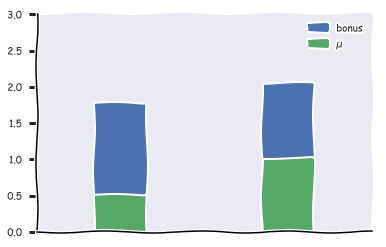

In [7]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


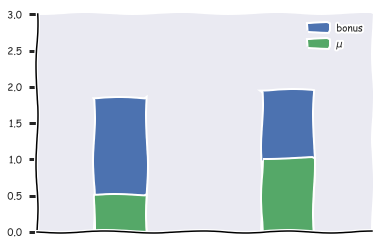

In [8]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


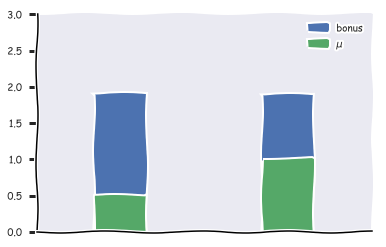

In [9]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=0, reward=0)


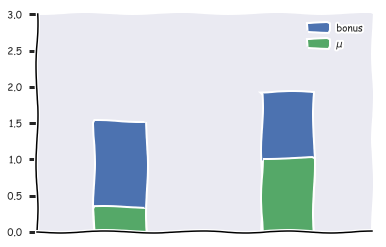

In [10]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


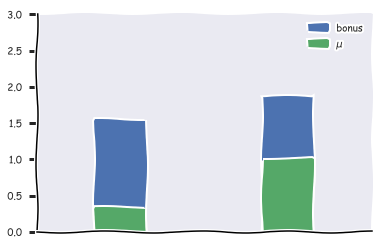

In [11]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


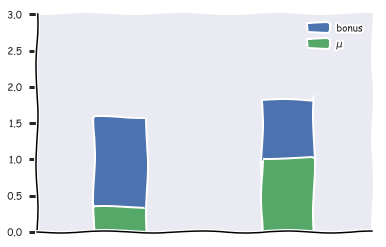

In [12]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


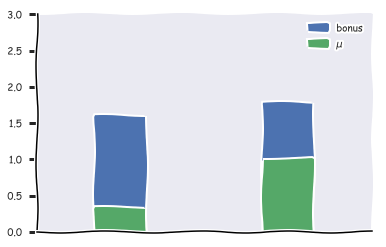

In [13]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


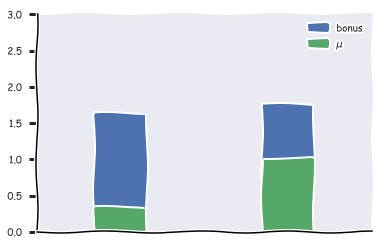

In [14]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


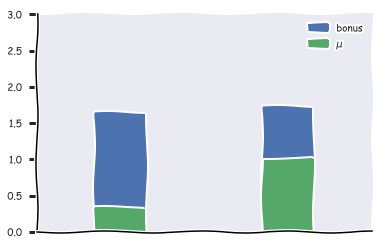

In [15]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


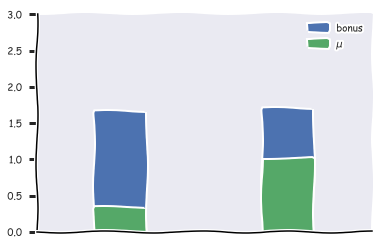

In [16]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


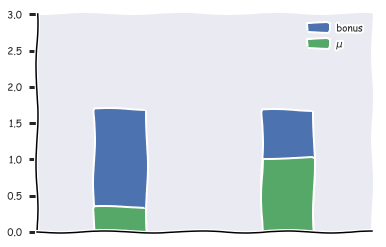

In [17]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=0, reward=0)


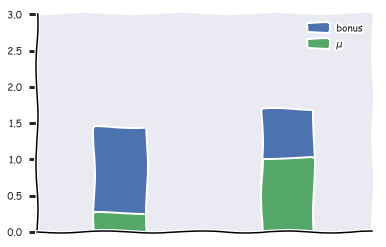

In [18]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


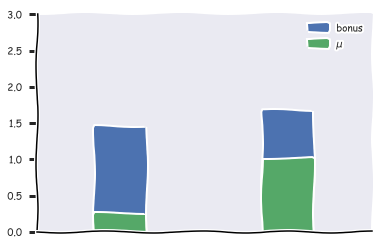

In [19]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


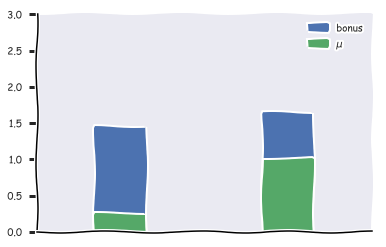

In [20]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=0)


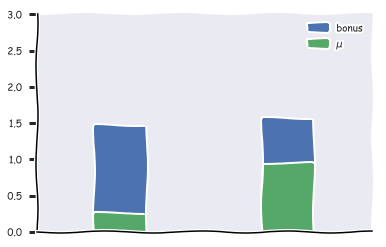

In [21]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=0)


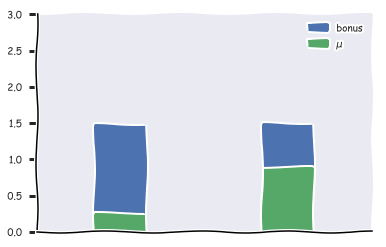

In [22]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


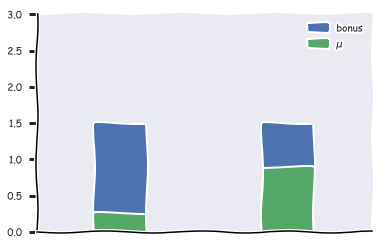

In [23]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=0, reward=0)


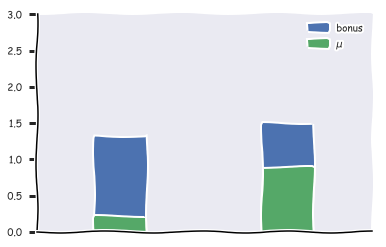

In [24]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


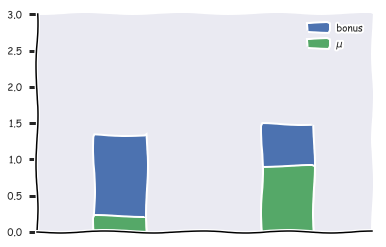

In [25]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


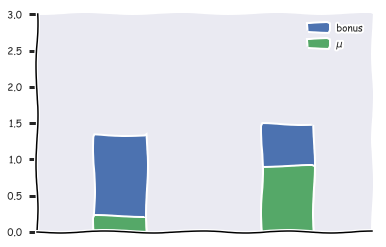

In [26]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


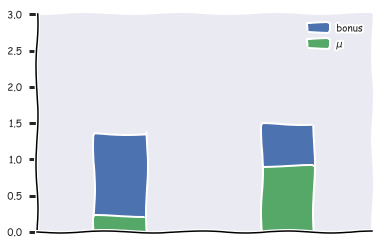

In [27]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


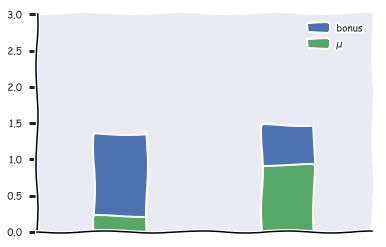

In [28]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


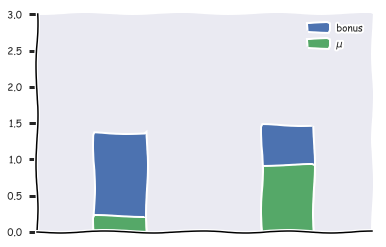

In [29]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


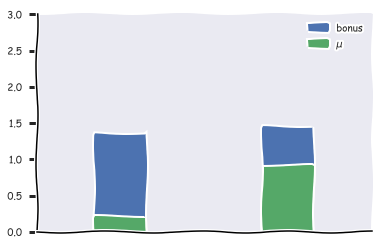

In [30]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


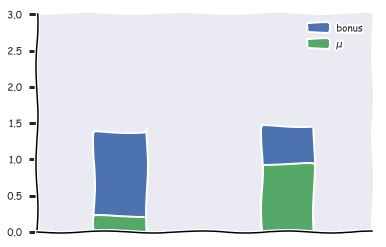

In [31]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=0)


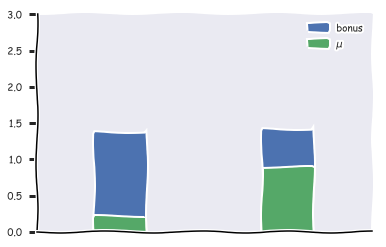

In [32]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=0)


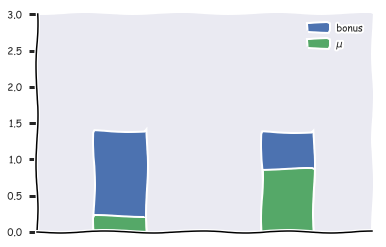

In [33]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=0, reward=0)


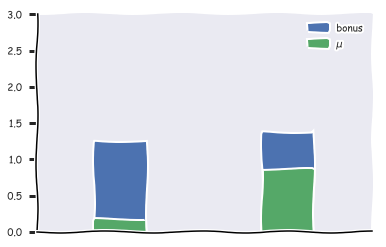

In [34]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


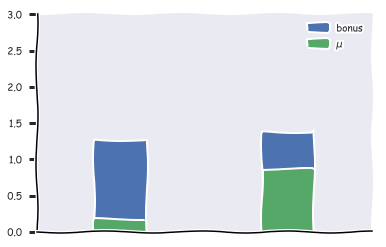

In [35]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=0)


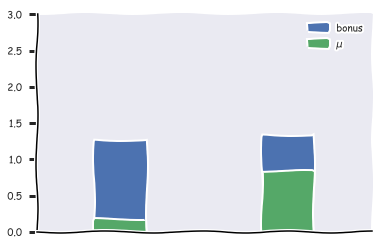

In [36]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


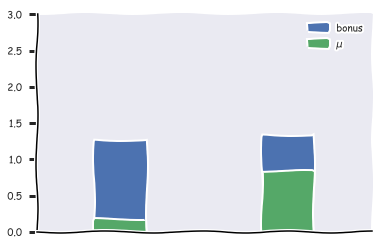

In [37]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


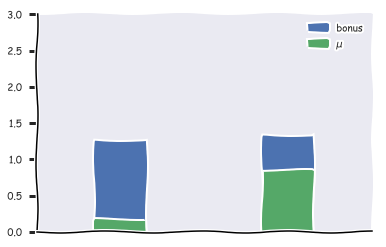

In [38]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


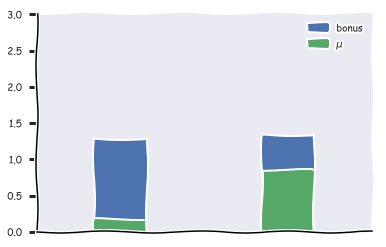

In [39]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=0)


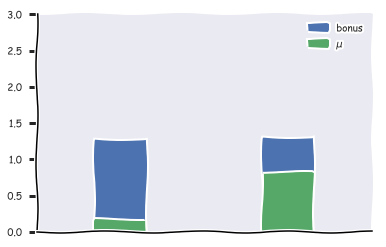

In [40]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


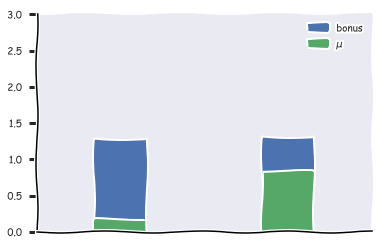

In [41]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=1)


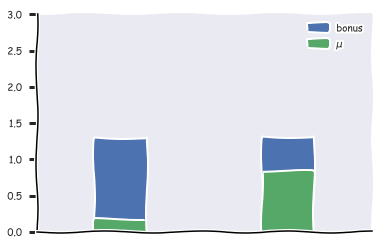

In [42]:
play()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Last observation: Observation(arm_id=1, reward=0)


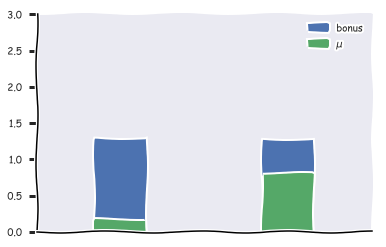

In [43]:
play()

# DONE  --> go back

In [45]:
#fix.savefig('comp.png')
from IPython.display import Image

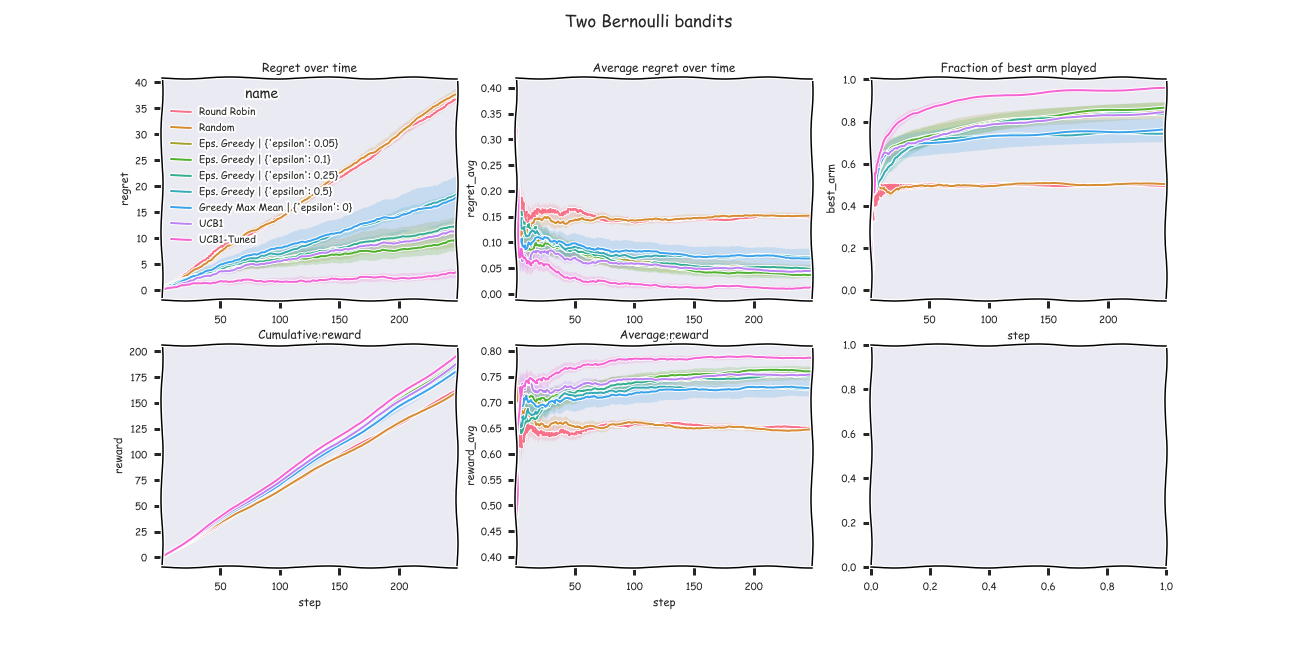

In [46]:
Image('comp.png')